In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
from datetime import datetime
sys.path.insert(0, '../code')
import utilsV2 as utils
import STL as STLUtils

In [4]:
register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

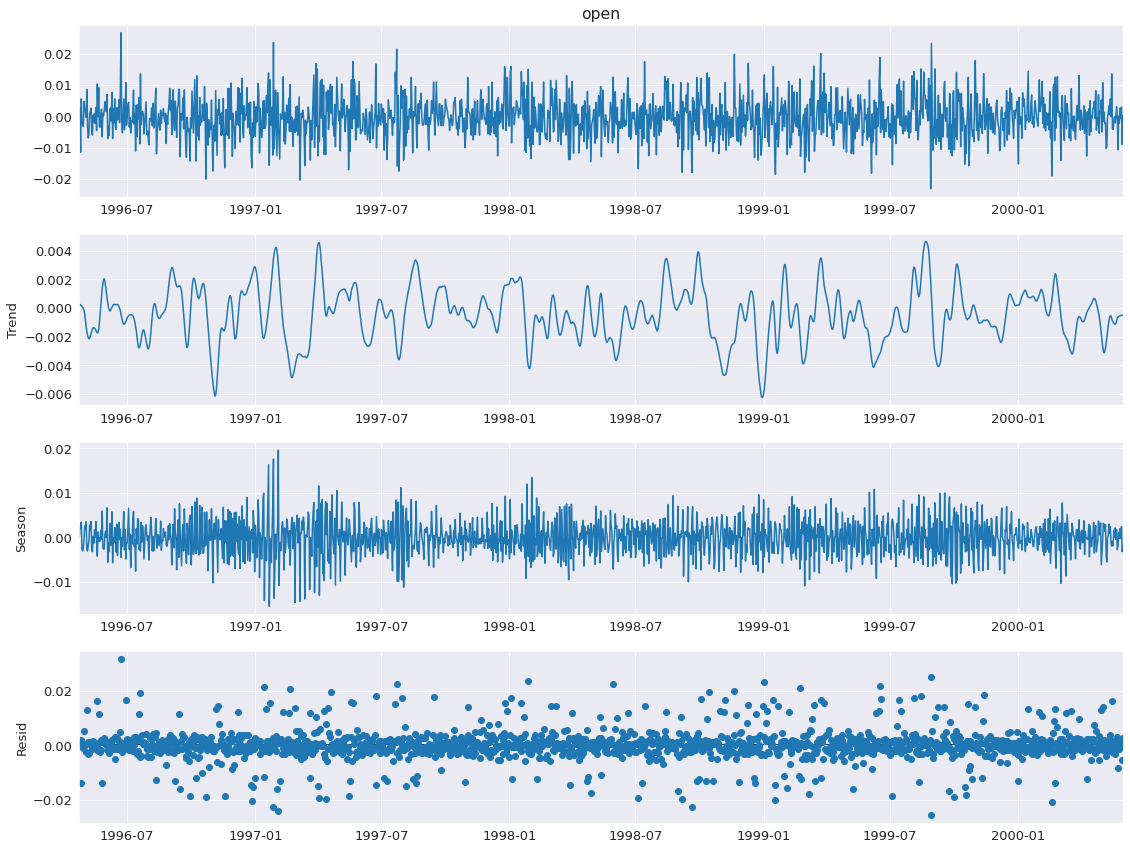

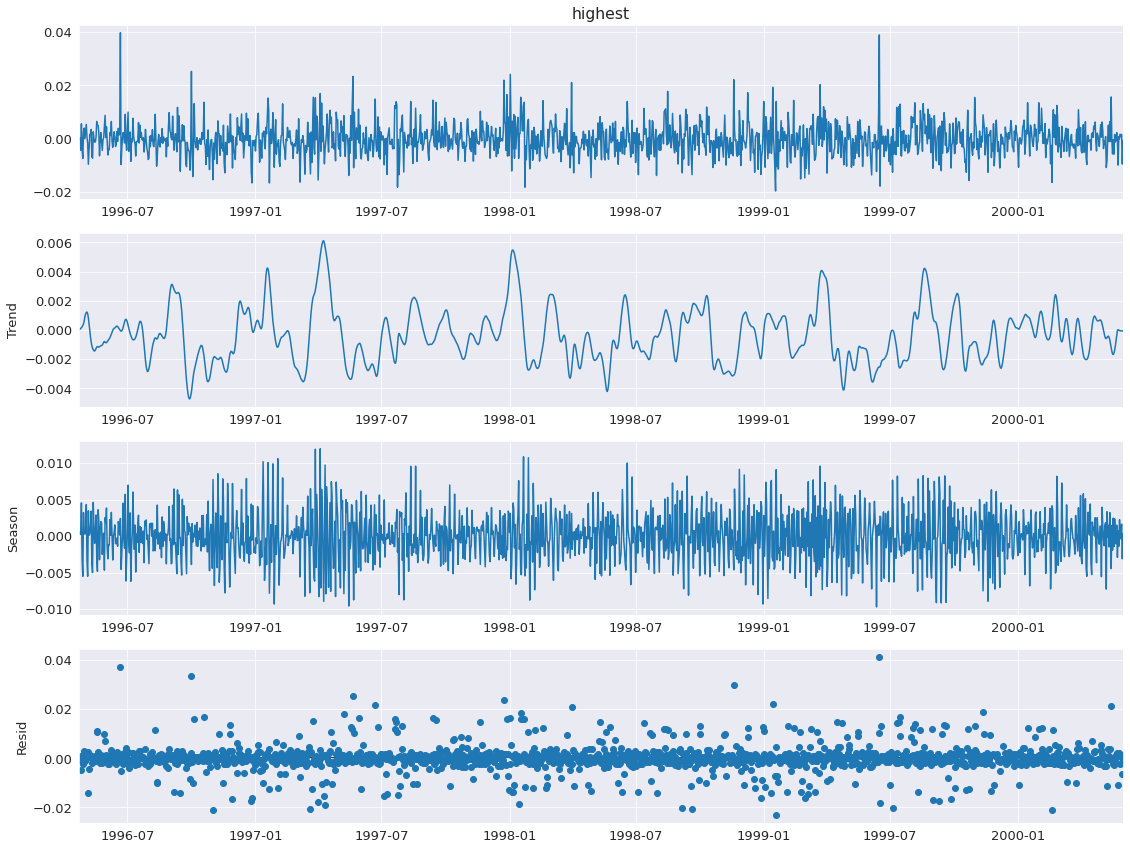

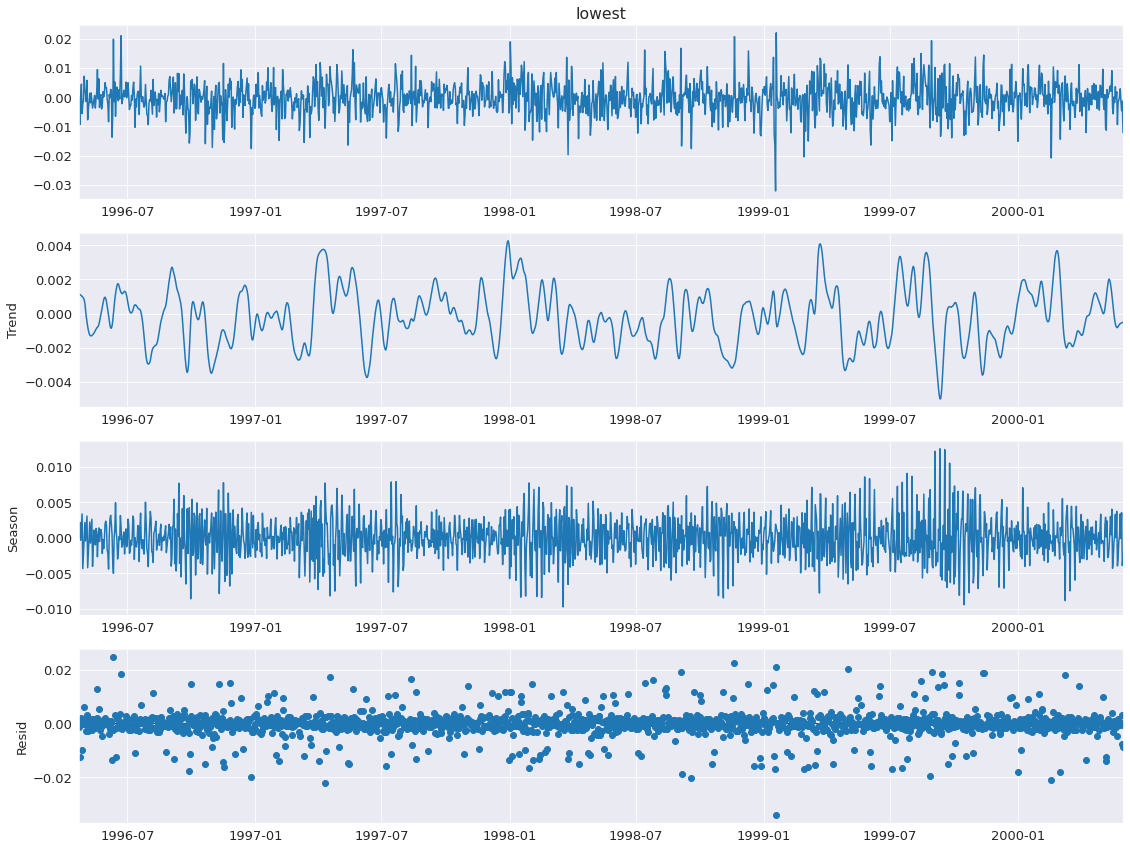

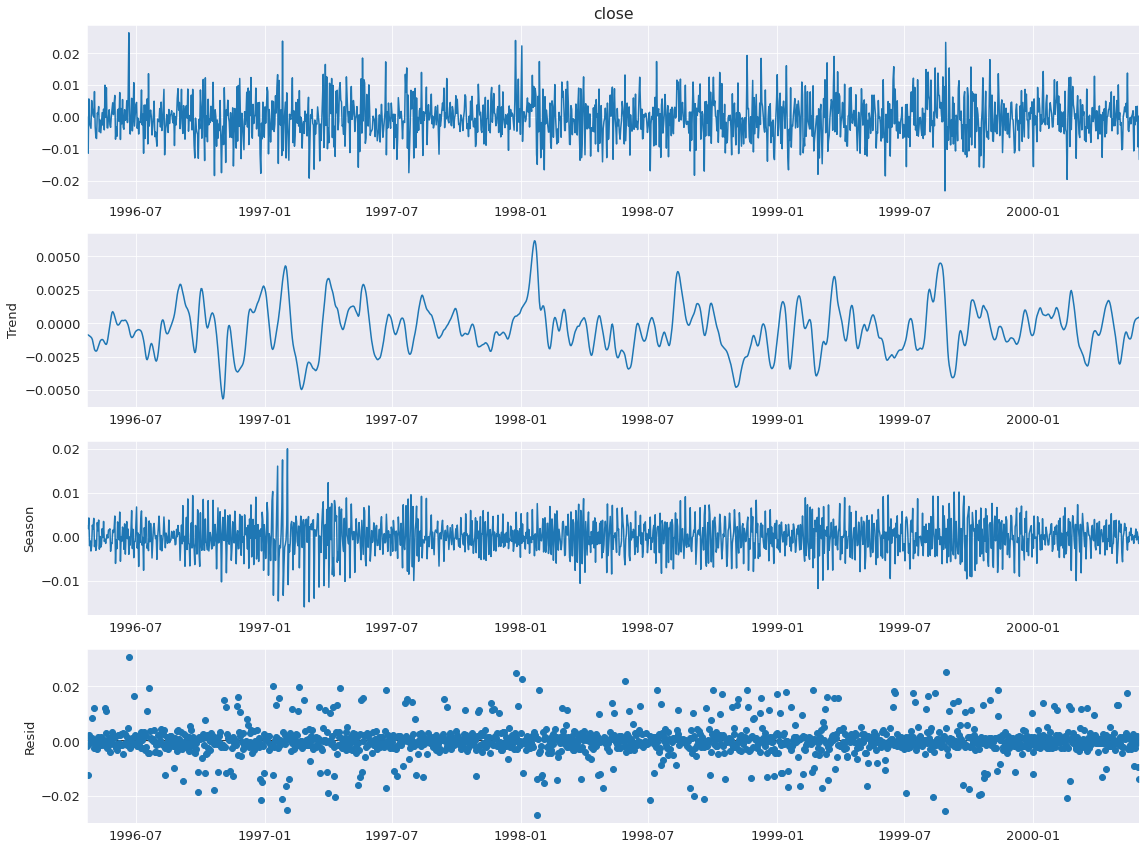

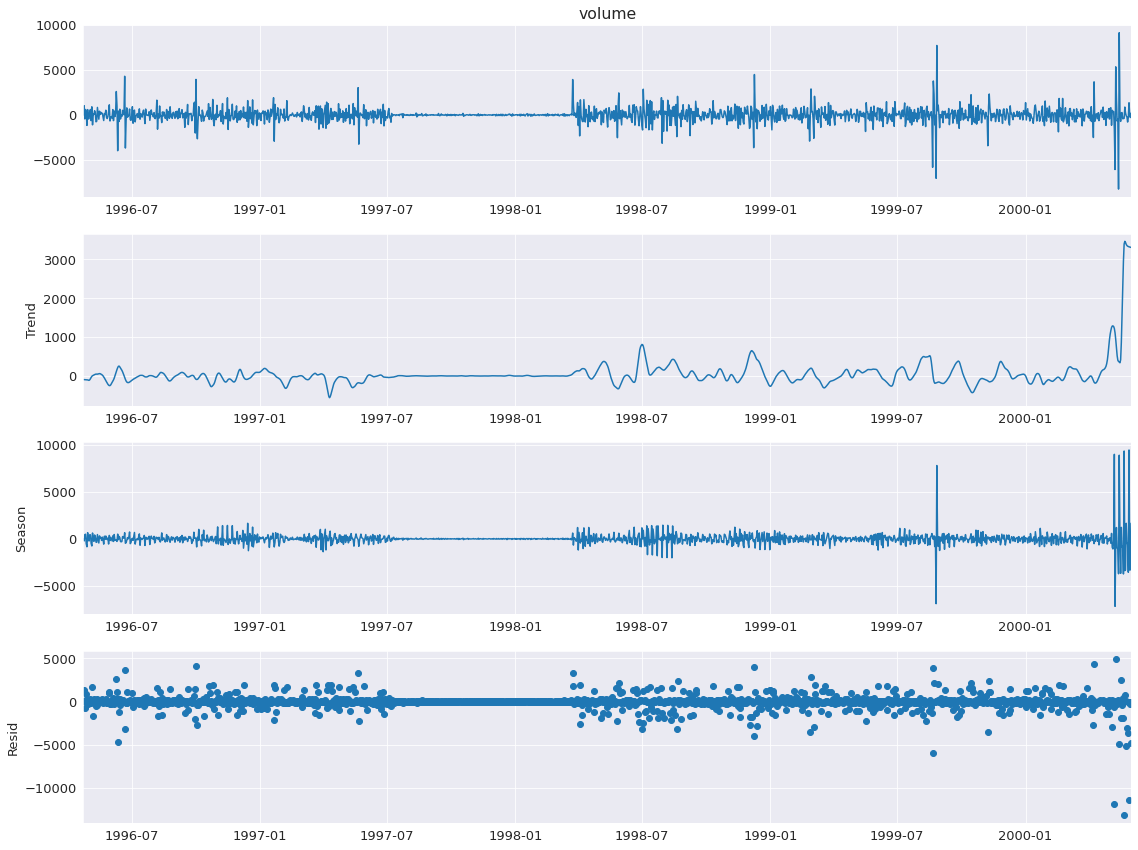

In [6]:
df = pd.read_csv("../dataset/EURUSDDaily.csv", index_col=0)

df.columns = ['open', 'highest', 'lowest', 'close', 'volume', 'unknown']

for column in df.columns[:-1]:
    data = df[[column]]
    flat_arr = data.to_numpy().flatten()
    d = STLUtils.smoothCurve(flat_arr)[:1500]
    series = pd.Series(d, index=pd.date_range('23-4-1996', periods=len(d), freq='D'), name = column)
    stl = STL(series, seasonal=5, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
    res = stl.fit()
    res.plot()

# open, highest, lowest, close, volume = utils.STLDecomposition(df)